In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns


In [2]:
df=pd.read_csv("owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32579,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32580,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32581,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32582,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
var_num=df.select_dtypes(exclude=['object']).columns.tolist()
var_num

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

total_cases


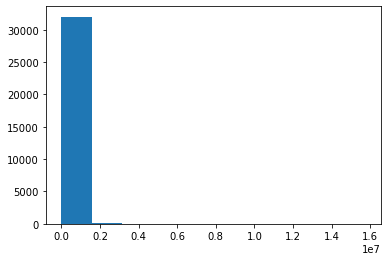

new_cases


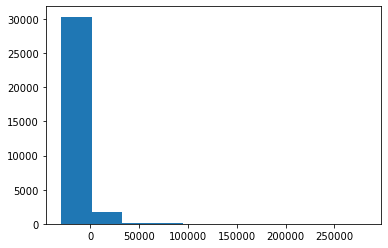

total_deaths


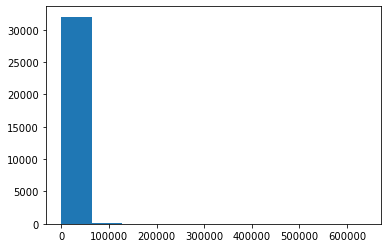

new_deaths


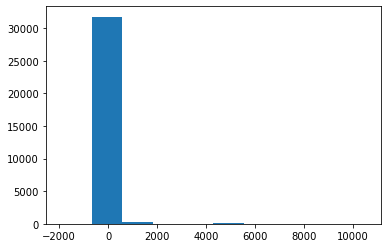

total_cases_per_million


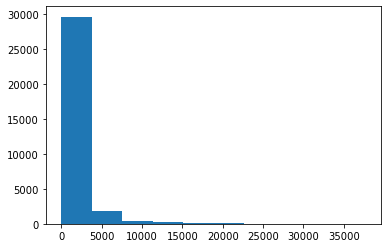

new_cases_per_million


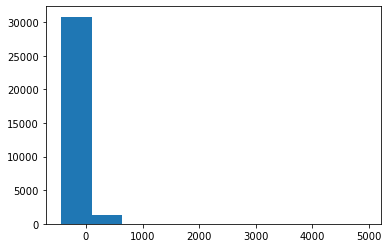

total_deaths_per_million


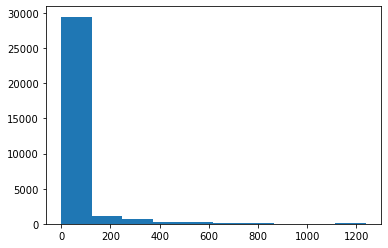

new_deaths_per_million


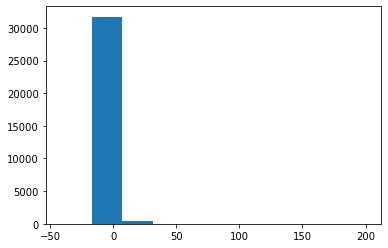

new_tests


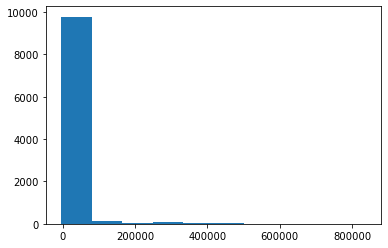

total_tests


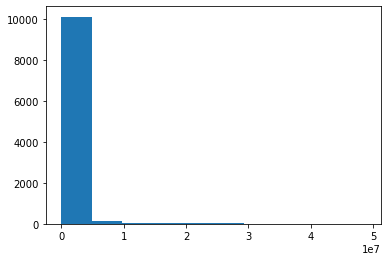

total_tests_per_thousand


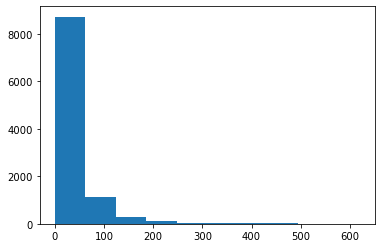

new_tests_per_thousand


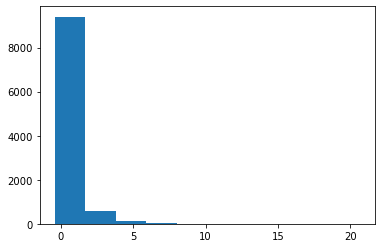

new_tests_smoothed


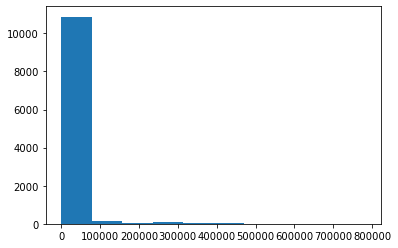

new_tests_smoothed_per_thousand


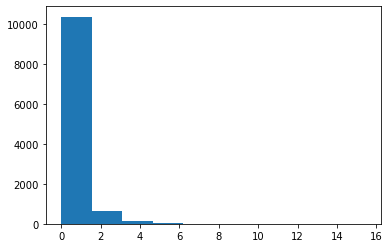

stringency_index


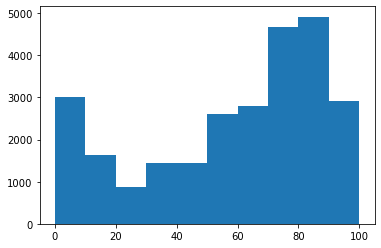

population


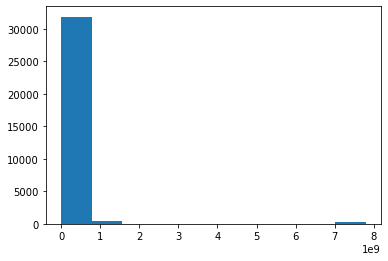

population_density


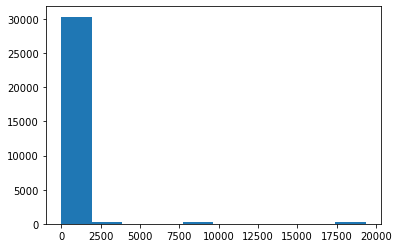

median_age


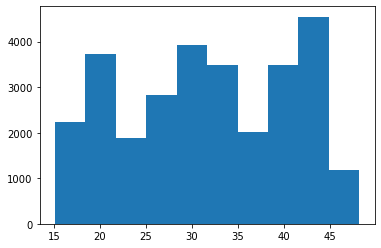

aged_65_older


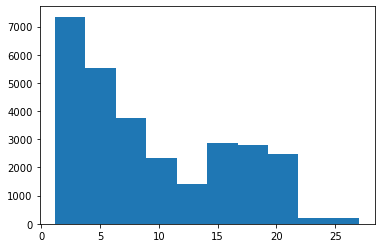

aged_70_older


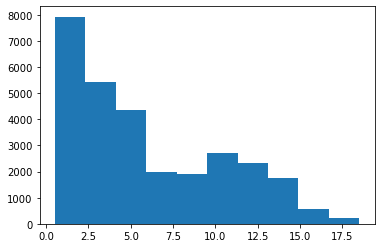

gdp_per_capita


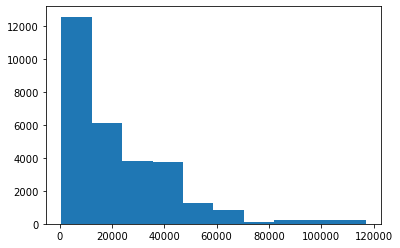

extreme_poverty


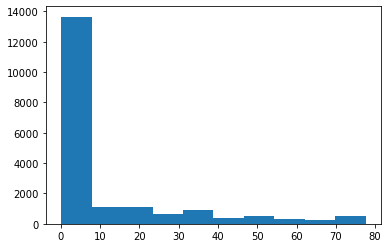

cardiovasc_death_rate


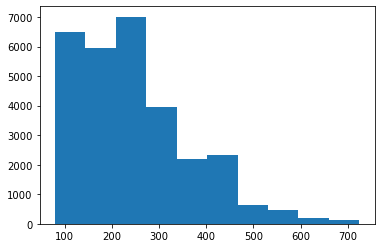

diabetes_prevalence


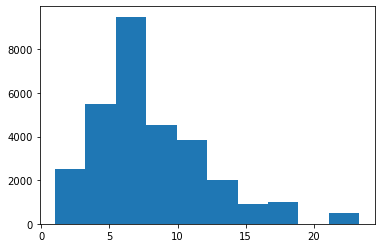

female_smokers


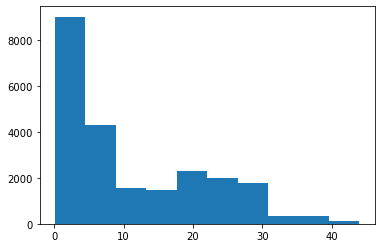

male_smokers


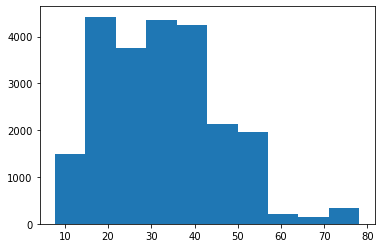

handwashing_facilities


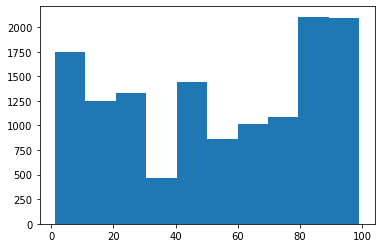

hospital_beds_per_thousand


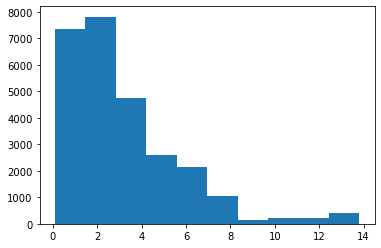

life_expectancy


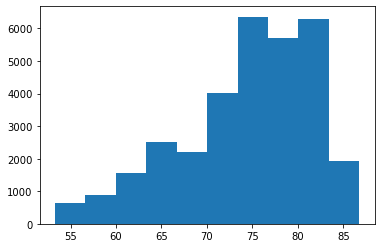

In [4]:
for z in var_num:
    print(z)
    plt.figure(z)
    plt.hist(df[z],bins=10)
    plt.show()

<AxesSubplot:xlabel='iso_code', ylabel='count'>

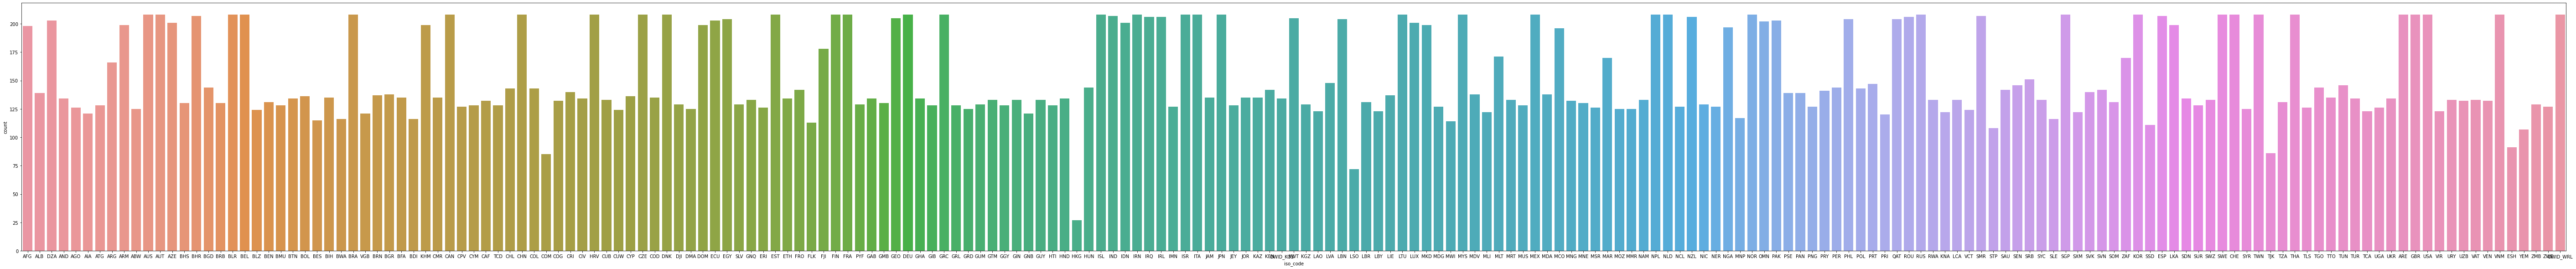

In [5]:
plt.figure(figsize=(100,10))
sns.countplot(df.iso_code)


<AxesSubplot:xlabel='continent', ylabel='count'>

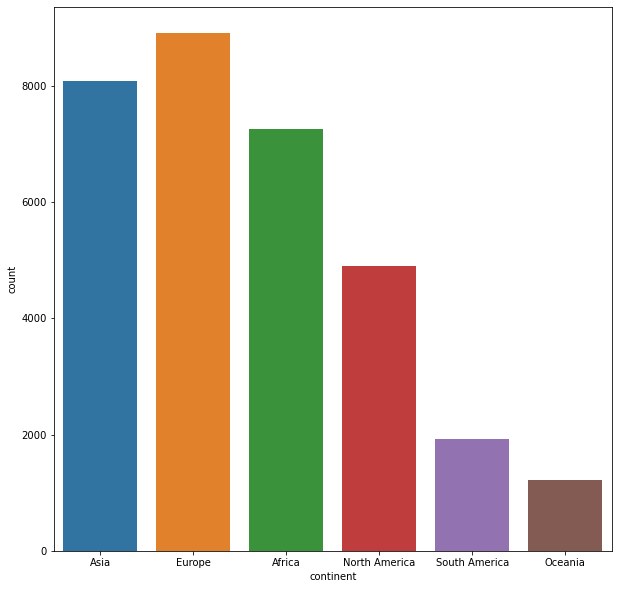

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(df.continent)



<AxesSubplot:xlabel='location', ylabel='count'>

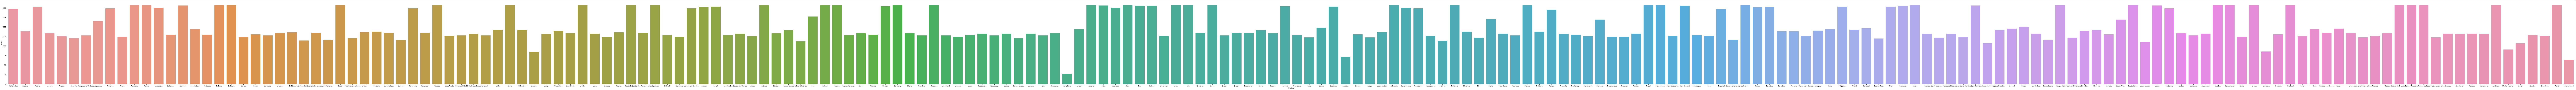

In [7]:
plt.figure(figsize=(300,10))
sns.countplot(df.location)


<AxesSubplot:xlabel='tests_units', ylabel='count'>

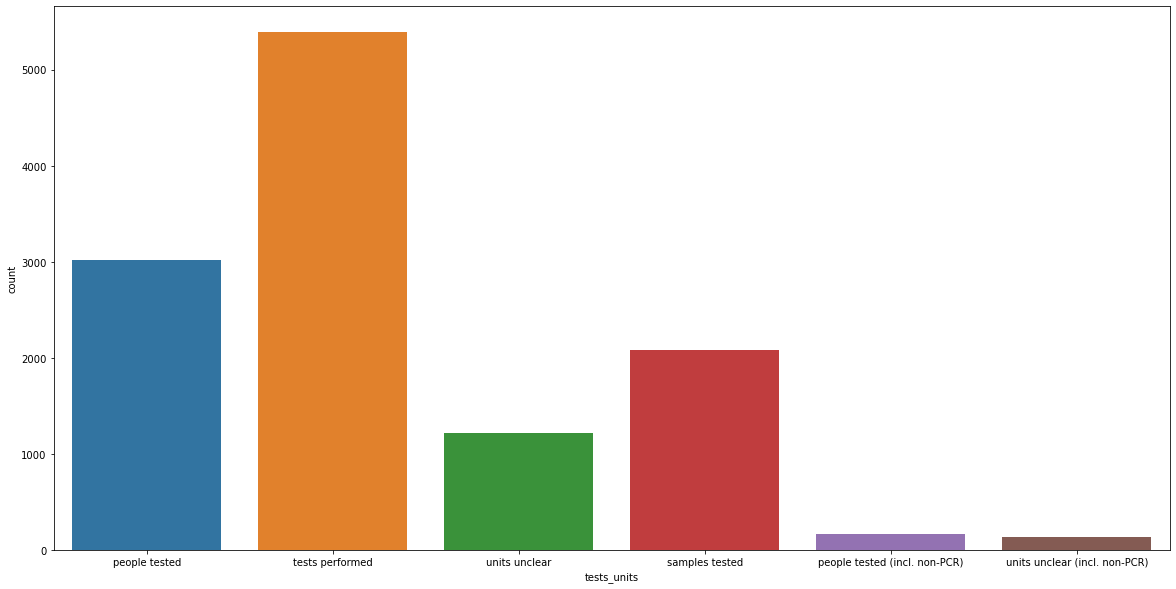

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(df.tests_units)

<AxesSubplot:>

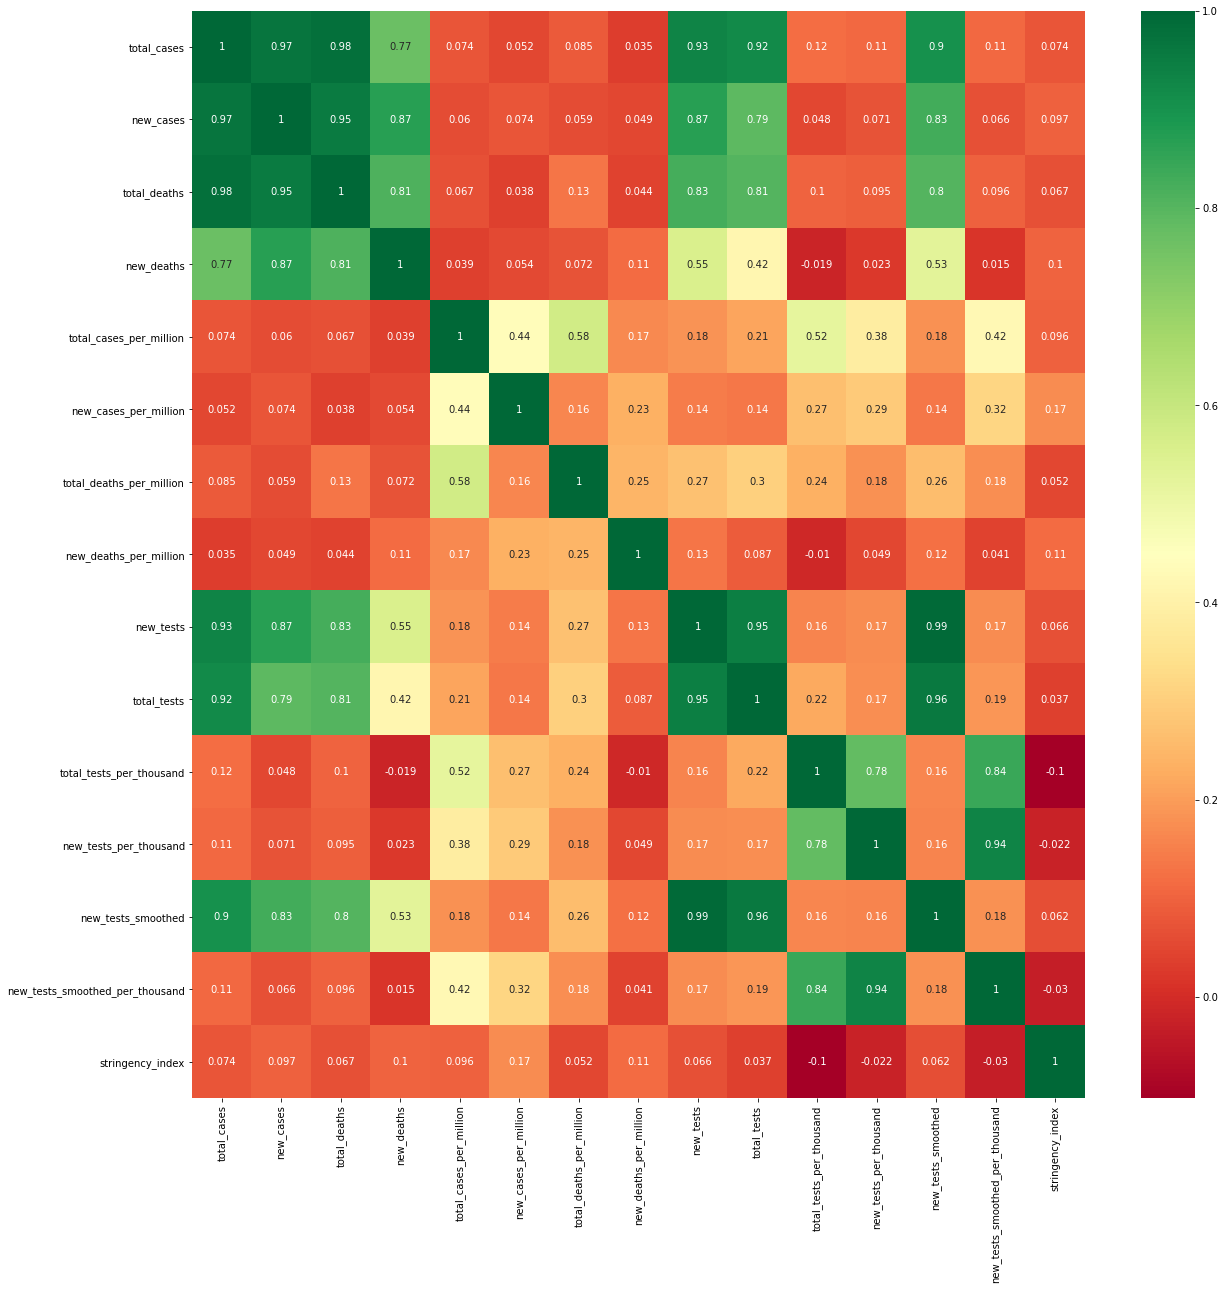

In [9]:
X = df.iloc[:,0:20]
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heatmap
sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Handle Missing values:**

<AxesSubplot:>

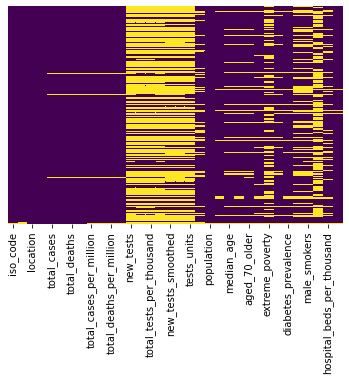

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Finding features containing null values

In [11]:
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
feature_with_na

['iso_code',
 'continent',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

In [12]:
for i in feature_with_na:
    print(i,":",np.round(df[i].isnull().mean(),4)*100,"% missing values")

iso_code : 0.2 % missing values
continent : 0.83 % missing values
total_cases : 1.11 % missing values
new_cases : 1.11 % missing values
total_deaths : 1.11 % missing values
new_deaths : 1.11 % missing values
total_cases_per_million : 1.31 % missing values
new_cases_per_million : 1.31 % missing values
total_deaths_per_million : 1.31 % missing values
new_deaths_per_million : 1.31 % missing values
new_tests : 68.86 % missing values
total_tests : 68.12 % missing values
total_tests_per_thousand : 68.12 % missing values
new_tests_per_thousand : 68.86 % missing values
new_tests_smoothed : 65.52 % missing values
new_tests_smoothed_per_thousand : 65.52 % missing values
tests_units : 63.160000000000004 % missing values
stringency_index : 19.09 % missing values
population : 0.2 % missing values
population_density : 4.49 % missing values
median_age : 9.969999999999999 % missing values
aged_65_older : 11.27 % missing values
aged_70_older : 10.43 % missing values
gdp_per_capita : 11.05 % missing val

# Now we will handle null values for numerical and categorical values seperately

In [13]:
numerical_with_na=[]
for j in feature_with_na:
    if df[j].dtypes!='O':
        numerical_with_na.append(j)

# Numerical features containing null values

In [14]:
numerical_with_na

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

**replace the null values for numerical data by the mean of that column**

In [15]:
for i in numerical_with_na:
    df[i]=df[i].fillna(df[i].mean())

<AxesSubplot:>

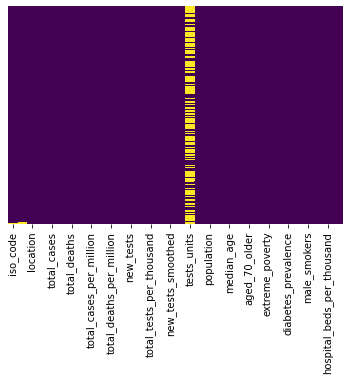

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# categorical features containing null values

In [17]:
categorical_with_na=[]
for j in feature_with_na:
    if df[j].dtypes=='O':
        categorical_with_na.append(j)

In [18]:
print("Categorical features with null values are :\n",categorical_with_na)

Categorical features with null values are :
 ['iso_code', 'continent', 'tests_units']


**replace the null values of categorical data by the mode of that column**

In [19]:
for i in categorical_with_na:
    df[i]=df[i].fillna(df[i].value_counts().index[0])

<AxesSubplot:>

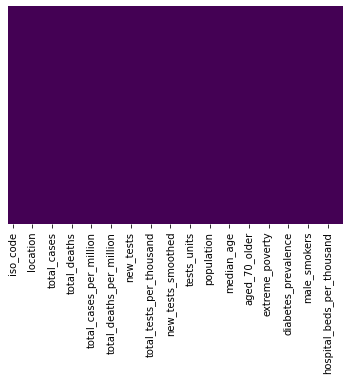

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
var_cat=df.select_dtypes(include=['object']).columns.tolist()
var_cat

['iso_code', 'continent', 'location', 'date', 'tests_units']

In [22]:
df=df.drop(var_cat,axis=1)
df.head()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16269.127637,759392.737197,...,1.337,1803.987,11.426641,597.029,9.59,11.001607,32.639423,37.746,0.5,64.83
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16269.127637,759392.737197,...,1.337,1803.987,11.426641,597.029,9.59,11.001607,32.639423,37.746,0.5,64.83
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16269.127637,759392.737197,...,1.337,1803.987,11.426641,597.029,9.59,11.001607,32.639423,37.746,0.5,64.83
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16269.127637,759392.737197,...,1.337,1803.987,11.426641,597.029,9.59,11.001607,32.639423,37.746,0.5,64.83
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16269.127637,759392.737197,...,1.337,1803.987,11.426641,597.029,9.59,11.001607,32.639423,37.746,0.5,64.83


In [23]:
x=df.drop(['total_cases','new_cases'],axis='columns')


In [24]:
y=df.total_cases.values

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

**Model Evaluation**

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [30]:
# print the intercept
print(lin_reg.intercept_)

49753.743067568794


In [31]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
total_deaths,523718.806781
new_deaths,-34339.716859
total_cases_per_million,23225.431769
new_cases_per_million,2202.755005
total_deaths_per_million,-38233.603109
new_deaths_per_million,4440.426072
new_tests,-10353.290210
total_tests,18395.918587
total_tests_per_thousand,-6274.885119
new_tests_per_thousand,4604.896338


**Predictions from our Model**

Let's grab predictions off our test set and see how well it did!

In [32]:
pred = lin_reg.predict(X_test)

In [33]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

**Residual Histogram**

In [34]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

# Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
1n∑i=1n|yi−y^i|
 
Mean Squared Error (MSE) is the mean of the squared errors:
1n∑i=1n(yi−y^i)2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
1n∑i=1n(yi−y^i)2−−−−−−−−−−−−√
 
📌 Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [35]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 23966.335455499047
MSE: 8523082183.056906
RMSE: 92320.54041792057
R2 Square 0.958380160746533
__________________________________
Train set evaluation:
_____________________________________
MAE: 23652.322123638667
MSE: 7513476754.332778
RMSE: 86680.31353388599
R2 Square 0.969910837817014
__________________________________


In [36]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,23966.335455,8.523082e+09,92320.540418,0.95838


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 978.5152362395596
MSE: 158176809.7766652
RMSE: 12576.836238763119
R2 Square 0.9992275924066979
__________________________________
Train set evaluation:
_____________________________________
MAE: 434.4190762417488
MSE: 25644688.109440435
RMSE: 5064.058462285011
R2 Square 0.999897300916089
__________________________________


In [38]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': test_pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [39]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,23966.335455,8.523082e+09,92320.540418,0.958380
1,Random Forest Regressor,978.515236,1.581768e+08,12576.836239,0.999228


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='elu'))
model.add(Dense(32, activation='elu'))


model.add(Dense(64, activation='elu'))


model.add(Dense(51, activation='elu'))

model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=15,
              epochs=200)

Epoch 1/200
1521/1521 [==============================] - 1s 610us/step - loss: 199398866944.0000 - val_loss: 84627931136.0000
Epoch 2/200
1521/1521 [==============================] - 1s 552us/step - loss: 55062564864.0000 - val_loss: 29437386752.0000
Epoch 3/200
1521/1521 [==============================] - 1s 537us/step - loss: 24740243456.0000 - val_loss: 16982955008.0000
Epoch 4/200
1521/1521 [==============================] - 1s 558us/step - loss: 12422729728.0000 - val_loss: 9135108096.0000
Epoch 5/200
1521/1521 [==============================] - 1s 553us/step - loss: 7497214464.0000 - val_loss: 5530564608.0000
Epoch 6/200
1521/1521 [==============================] - 1s 539us/step - loss: 5755807744.0000 - val_loss: 3904567040.0000
Epoch 7/200
1521/1521 [==============================] - 1s 546us/step - loss: 4920300032.0000 - val_loss: 4341022720.0000
Epoch 8/200
1521/1521 [==============================] - 1s 546us/step - loss: 4585680896.0000 - val_loss: 3555389696.0000
Epoch 9/

1521/1521 [==============================] - 1s 544us/step - loss: 415719552.0000 - val_loss: 448440768.0000
Epoch 68/200
1521/1521 [==============================] - 1s 533us/step - loss: 558146176.0000 - val_loss: 453150240.0000
Epoch 69/200
1521/1521 [==============================] - 1s 554us/step - loss: 400152896.0000 - val_loss: 294960992.0000
Epoch 70/200
1521/1521 [==============================] - 1s 543us/step - loss: 481177760.0000 - val_loss: 338341184.0000
Epoch 71/200
1521/1521 [==============================] - 1s 540us/step - loss: 406064128.0000 - val_loss: 429127648.0000
Epoch 72/200
1521/1521 [==============================] - 1s 543us/step - loss: 731672000.0000 - val_loss: 357810688.0000
Epoch 73/200
1521/1521 [==============================] - 1s 541us/step - loss: 586714176.0000 - val_loss: 337683232.0000
Epoch 74/200
1521/1521 [==============================] - ETA: 0s - loss: 685471680.000 - 1s 531us/step - loss: 661079296.0000 - val_loss: 495056640.0000
Epoch

1521/1521 [==============================] - 1s 549us/step - loss: 382412512.0000 - val_loss: 247799792.0000
Epoch 134/200
1521/1521 [==============================] - 1s 531us/step - loss: 291430560.0000 - val_loss: 806747008.0000
Epoch 135/200
1521/1521 [==============================] - 1s 539us/step - loss: 480634592.0000 - val_loss: 219101600.0000
Epoch 136/200
1521/1521 [==============================] - 1s 556us/step - loss: 190032144.0000 - val_loss: 179019776.0000
Epoch 137/200
1521/1521 [==============================] - 1s 539us/step - loss: 394283712.0000 - val_loss: 191008608.0000
Epoch 138/200
1521/1521 [==============================] - 1s 542us/step - loss: 475955200.0000 - val_loss: 251978976.0000
Epoch 139/200
1521/1521 [==============================] - 1s 545us/step - loss: 184727680.0000 - val_loss: 242037808.0000
Epoch 140/200
1521/1521 [==============================] - 1s 543us/step - loss: 319557664.0000 - val_loss: 183557584.0000
Epoch 141/200
1521/1521 [=====

1521/1521 [==============================] - 1s 544us/step - loss: 312067456.0000 - val_loss: 216209968.0000
Epoch 200/200
1521/1521 [==============================] - 1s 548us/step - loss: 244301824.0000 - val_loss: 115635392.0000


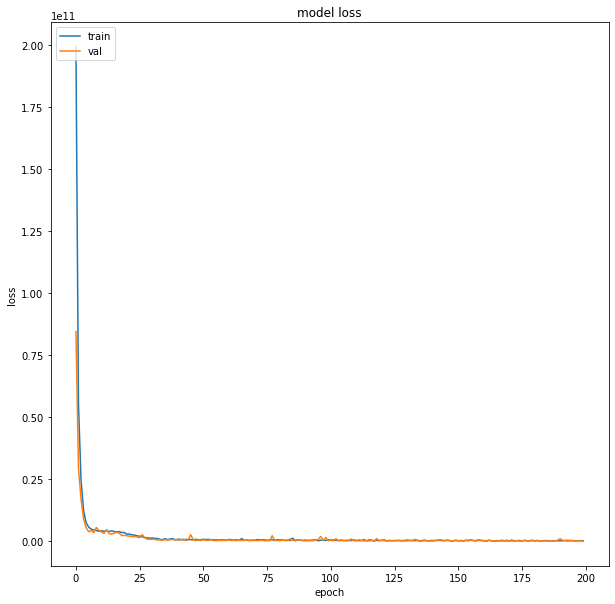

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [42]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3176.3123636855867
MSE: 115635421.4392491
RMSE: 10753.391159966659
R2 Square 0.9994353301365702
__________________________________
Train set evaluation:
_____________________________________
MAE: 3043.9913657854836
MSE: 72729301.98892163
RMSE: 8528.147629404737
R2 Square 0.9997087415274509
__________________________________


In [43]:
results_df_2 = pd.DataFrame(data=[[" Neural Network", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,23966.335455,8.523082e+09,92320.540418,0.958380
1,Random Forest Regressor,978.515236,1.581768e+08,12576.836239,0.999228
2,Neural Network,3176.312364,1.156354e+08,10753.391160,0.999435


In [44]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': test_pred.flatten()}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [45]:
pd.DataFrame({'Error Values': (y_test -  test_pred.flatten())}).hvplot.kde()

:Distribution   [Error Values]   (Density)